# Breast Cancer Prediction: A Complete Machine Learning Workflow

This notebook presents a complete, beginner-friendly machine learning pipeline using the Wisconsin Breast Cancer dataset. 

Chosen as my first ML project, it offers a real-world, impactful problem—predicting whether a tumor is malignant or benign—while remaining approachable for newcomers. The dataset is well-structured, widely studied, and allows for hands-on practice with essential ML steps: data preprocessing, exploratory data analysis, model experimentation, and evaluation. 

By working through this project, you'll gain practical experience with the end-to-end workflow of building, interpreting, and validating a predictive model in a healthcare context.

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

## Table of Contents
1. [Data Preprocessing](#Data-Preprocessing)
2. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
3. [Model Experimentation](#Model-Experimentation)
   - [3.1 Feature Engineering for Modeling](#31-Feature-Engineering-for-Modeling)
   - [3.2 Train/Test Split (Stratified)](#32-TrainTest-Split-Stratified)
   - [3.3 Model Training & Evaluation (Before Hyperparameter Tuning)](#33-Model-Training--Evaluation-Before-Hyperparameter-Tuning)
   - [3.4 Model Comparison Table (Before Tuning)](#34-Model-Comparison-Table-Before-Tuning)
   - [3.5 Hyperparameter Tuning](#35-Hyperparameter-Tuning)
   - [3.6 Model Comparison Table (After Tuning)](#36-Model-Comparison-Table-After-Tuning)
4. [Final Model and Evaluation](#Final-Model-and-Evaluation)

## 1. Data Preprocessing
<a id="Data-Preprocessing"></a>
Steps: Data loading, cleaning, feature engineering, and preparation.

### Expert Explanation: Data Preprocessing

Data preprocessing is the foundation of any robust machine learning pipeline. In real-world scenarios, raw data is often noisy, incomplete, or inconsistent. Here, we load a pre-cleaned version of the Wisconsin Breast Cancer dataset to ensure that our analysis is not biased by data quality issues. This step includes:
- **Data loading:** Brings the dataset into memory for analysis.
- **Cleaning:** Ensures missing values, duplicates, or irrelevant features are handled (already done in this dataset).
- **Feature engineering:** Prepares features for modeling, which can include scaling, encoding, or creating new features (if needed).

> **Conclusion:** Proper preprocessing ensures that subsequent analysis and modeling are reliable and that results reflect true patterns in the data, not artifacts of poor data quality.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import skew, kurtosis, zscore
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

# Load the cleaned dataset
df = pd.read_csv('Data/Wisconsin Breast Cancer Dataset_cleaned.csv')
print(df.head(5))
print(df.shape)

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0             

## 2. Exploratory Data Analysis
<a id="Exploratory-Data-Analysis"></a>
Visualizations and statistics to understand the data.

### Expert Explanation: Exploratory Data Analysis (EDA)

EDA is a critical step to understand the structure, distribution, and relationships within the data before modeling. Here, we:
- **Visualize class distribution:** To check for class imbalance, which can bias model training and evaluation.
- **Compute summary statistics, skewness, and kurtosis:** To identify non-normality, outliers, and feature distributions, guiding further preprocessing or model selection.
- **Visualize features and correlations:** To spot informative features and multicollinearity, and to hypothesize which features may be most predictive.

> **Conclusion:** EDA provides intuition about the data, reveals potential pitfalls, and informs the choice of models and preprocessing steps. It is essential for building trust in the data and the results.

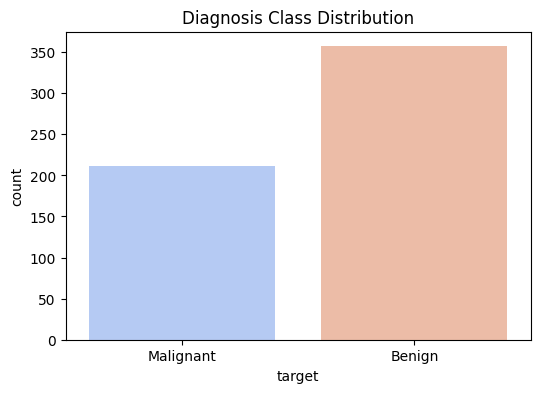

In [2]:
# Target class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title("Diagnosis Class Distribution")
plt.xticks([0,1], ["Malignant","Benign"])
plt.show()

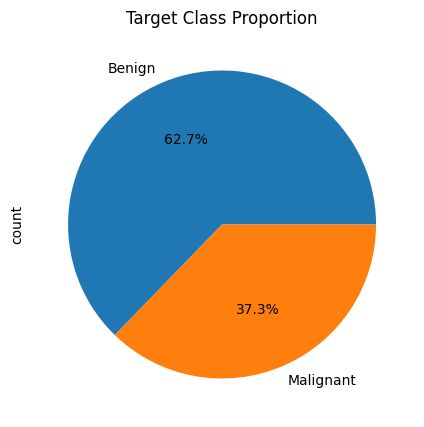

In [3]:
# Pie chart
plt.figure(figsize=(5,5))
df['target'].value_counts().plot.pie(autopct='%1.1f%%', labels=["Benign","Malignant"])
plt.title("Target Class Proportion")
plt.show()

In [4]:
# Summary statistics
print(df.describe().T)

                         count        mean         std         min  \
mean_radius              569.0   14.127292    3.524049    6.981000   
mean_texture             569.0   19.289649    4.301036    9.710000   
mean_perimeter           569.0   91.969033   24.298981   43.790000   
mean_area                569.0  654.889104  351.914129  143.500000   
mean_smoothness          569.0    0.096360    0.014064    0.052630   
mean_compactness         569.0    0.104341    0.052813    0.019380   
mean_concavity           569.0    0.088799    0.079720    0.000000   
mean_concave_points      569.0    0.048919    0.038803    0.000000   
mean_symmetry            569.0    0.181162    0.027414    0.106000   
mean_fractal_dimension   569.0    0.062798    0.007060    0.049960   
radius_error             569.0    0.405172    0.277313    0.111500   
texture_error            569.0    1.216853    0.551648    0.360200   
perimeter_error          569.0    2.866059    2.021855    0.757000   
area_error          

In [5]:
# Skewness
skewness = df.drop('target', axis=1).apply(skew).sort_values(ascending=False)
print("\n📌 Skewness:\n", skewness)


📌 Skewness:
 area_error                 5.432816
concavity_error            5.096981
fractal_dimension_error    3.913617
perimeter_error            3.434530
radius_error               3.080464
smoothness_error           2.308344
symmetry_error             2.189342
compactness_error          1.897202
worst_area                 1.854468
worst_fractal_dimension    1.658193
texture_error              1.642100
mean_area                  1.641391
worst_compactness          1.469667
concave_points_error       1.440867
worst_symmetry             1.430145
mean_concavity             1.397483
mean_fractal_dimension     1.301047
mean_compactness           1.186983
mean_concave_points        1.168090
worst_concavity            1.147202
worst_perimeter            1.125188
worst_radius               1.100205
mean_perimeter             0.988037
mean_radius                0.939893
mean_symmetry              0.723695
mean_texture               0.648734
worst_texture              0.497007
worst_concave_

In [6]:
# Kurtosis
kurt = df.drop('target', axis=1).apply(kurtosis).sort_values(ascending=False)
print("\n📌 Kurtosis:\n", kurt)


📌 Kurtosis:
 area_error                 48.767196
concavity_error            48.422562
fractal_dimension_error    26.039950
perimeter_error            21.203775
radius_error               17.521162
smoothness_error           10.367537
symmetry_error              7.816388
texture_error               5.291753
worst_fractal_dimension     5.188111
concave_points_error        5.070840
compactness_error           5.050966
worst_symmetry              4.395073
worst_area                  4.347331
mean_area                   3.609761
worst_compactness           3.002120
mean_fractal_dimension      2.969017
mean_concavity              1.970592
mean_compactness            1.625140
worst_concavity             1.590568
mean_symmetry               1.266117
worst_perimeter             1.050243
mean_concave_points         1.046680
mean_perimeter              0.953165
worst_radius                0.925288
mean_smoothness             0.837945
mean_radius                 0.827584
mean_texture            

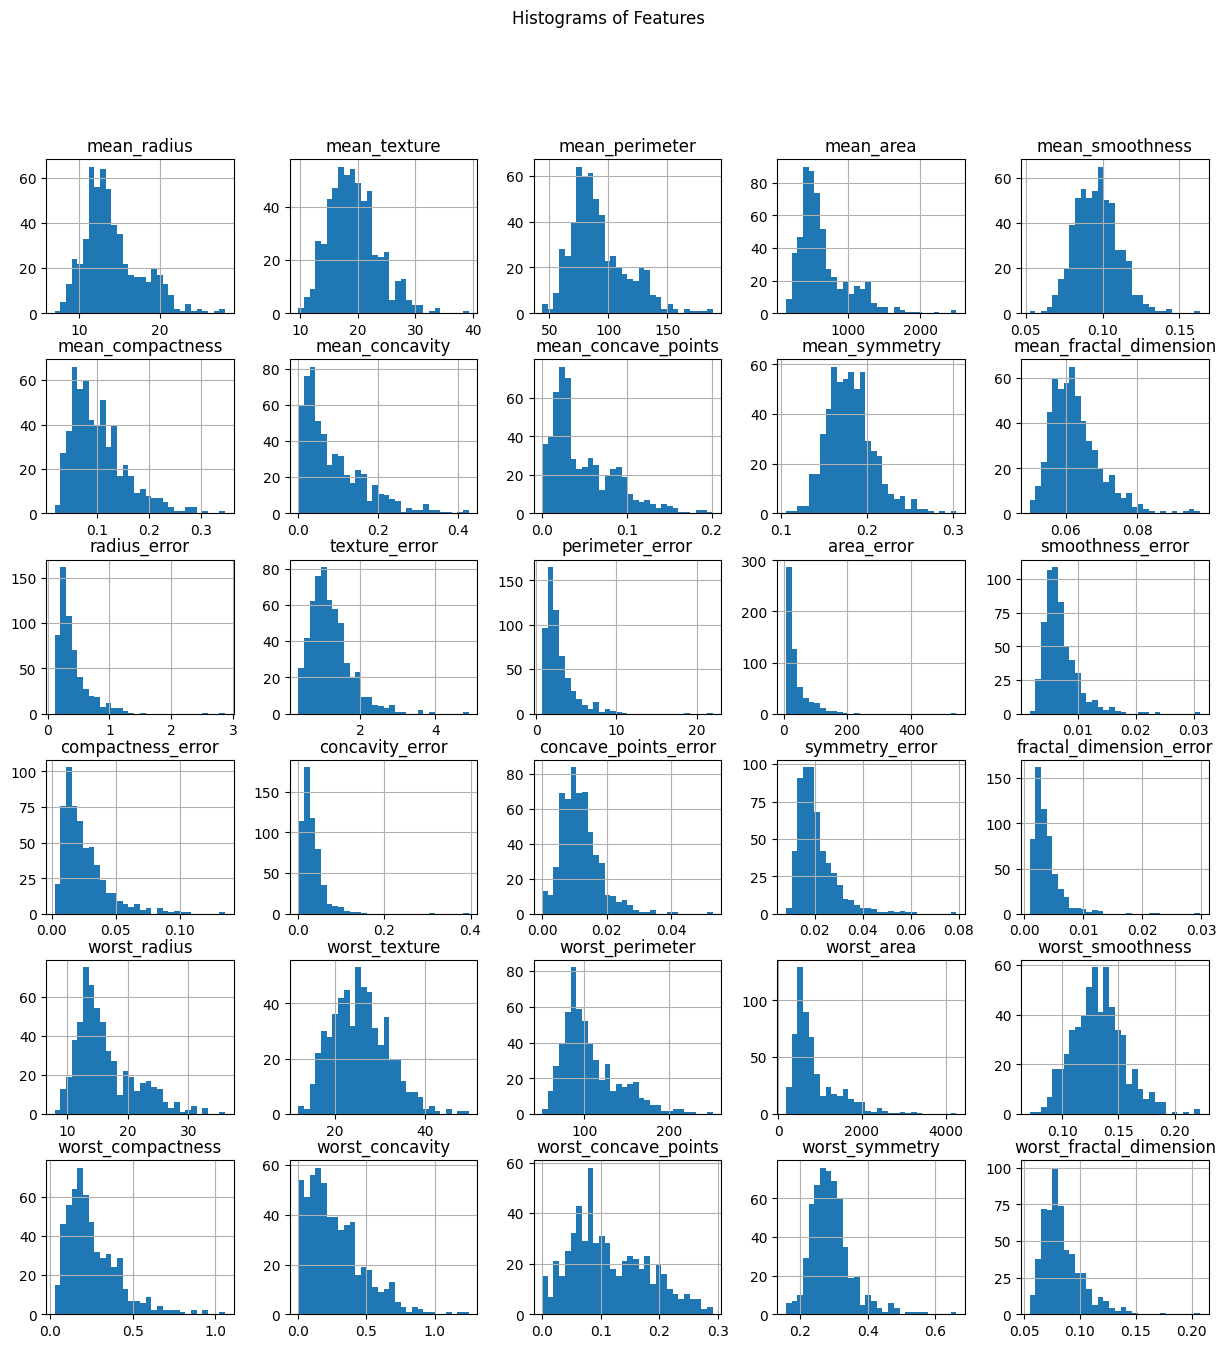

In [7]:
# Histograms of all features
df.drop('target', axis=1).hist(figsize=(15,15), bins=30)
plt.suptitle("Histograms of Features")
plt.show()

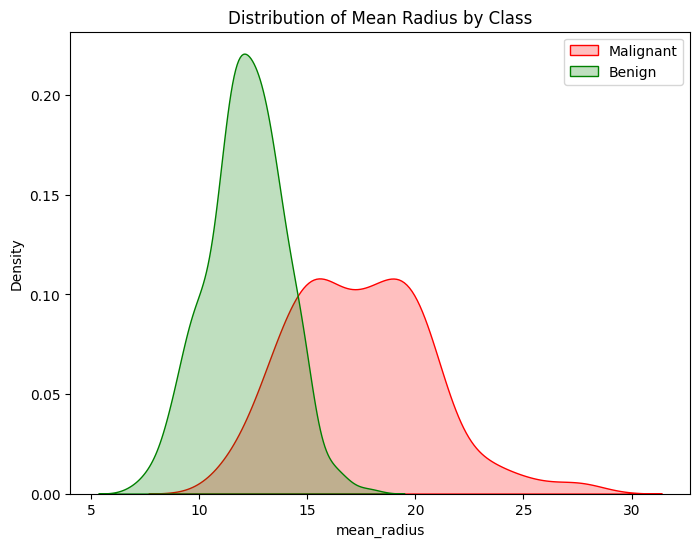

In [8]:
# KDE plot: mean radius by class
plt.figure(figsize=(8,6))
sns.kdeplot(df.loc[df['target']==0,'mean_radius'], label="Malignant", shade=True, color="red")
sns.kdeplot(df.loc[df['target']==1,'mean_radius'], label="Benign", shade=True, color="green")
plt.title("Distribution of Mean Radius by Class")
plt.legend()
plt.show()

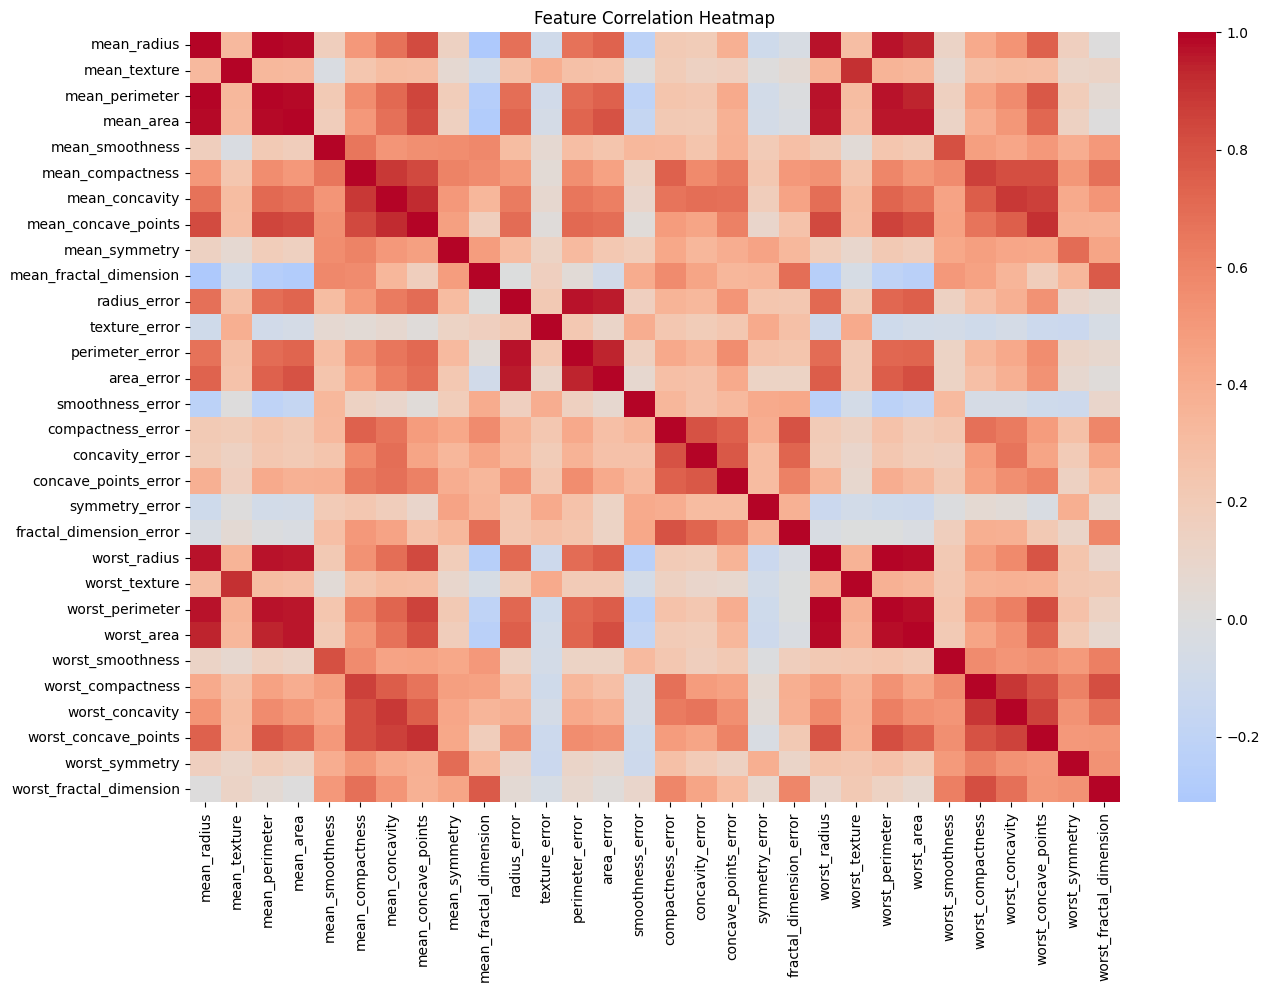


Correlation with target:
 smoothness_error           0.067016
mean_fractal_dimension     0.012838
texture_error              0.008303
symmetry_error             0.006522
fractal_dimension_error   -0.077972
concavity_error           -0.253730
compactness_error         -0.292999
worst_fractal_dimension   -0.323872
mean_symmetry             -0.330499
mean_smoothness           -0.358560
Name: target, dtype: float64


In [9]:
# Correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.drop('target', axis=1).corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()
# Features most correlated with target
target_corr = df.corr()['target'].drop('target').sort_values(ascending=False)
print("\nCorrelation with target:\n", target_corr.head(10))


Outliers per feature:
 211


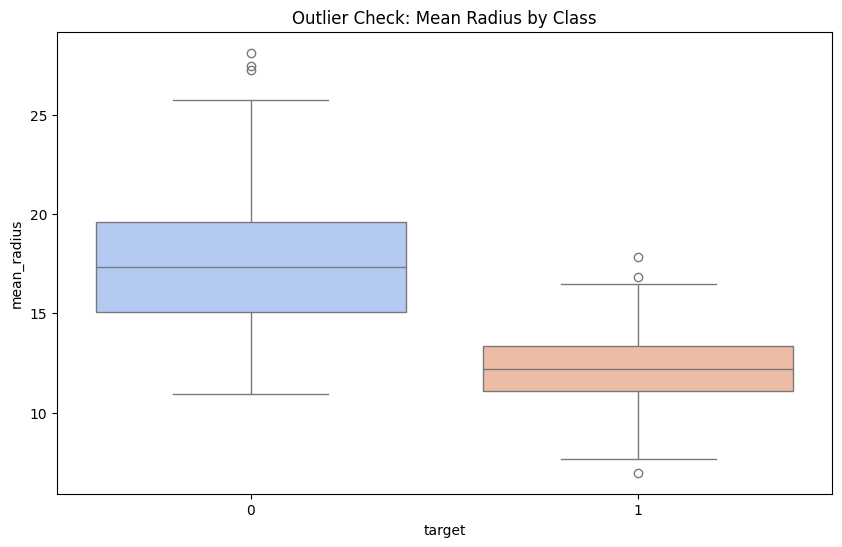

In [10]:
# Outliers per feature using Z-score
z_scores = np.abs(zscore(df.drop('target', axis=1)))
outliers = (z_scores > 3).sum()
print("\nOutliers per feature:\n", outliers)
# Boxplot for key feature
plt.figure(figsize=(10,6))
sns.boxplot(x='target', y='mean_radius', data=df, palette="coolwarm")
plt.title("Outlier Check: Mean Radius by Class")
plt.show()

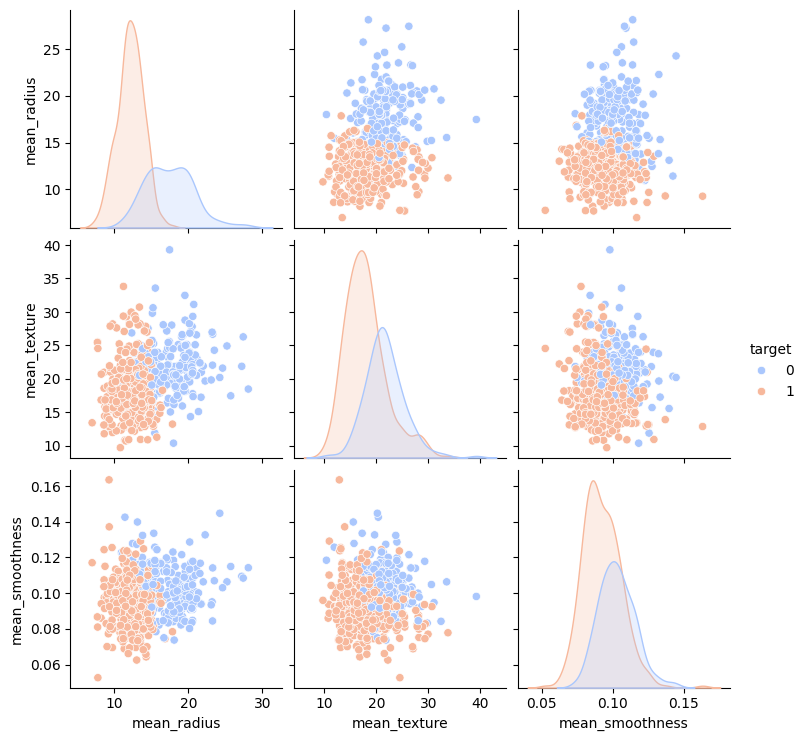

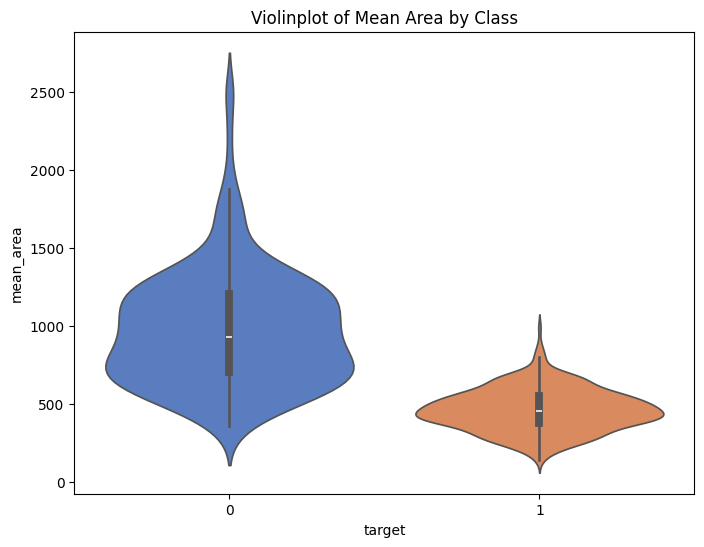

In [11]:
# Pairplot
sns.pairplot(df[['mean_radius','mean_texture','mean_smoothness','target']], hue='target', palette="coolwarm")
plt.show()
# Violin plot
plt.figure(figsize=(8,6))
sns.violinplot(x='target', y='mean_area', data=df, palette="muted")
plt.title("Violinplot of Mean Area by Class")
plt.show()

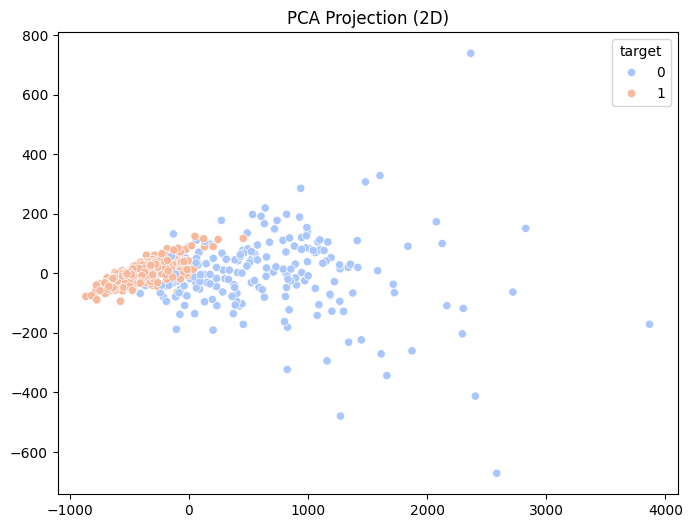

In [12]:
# PCA projection
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop('target', axis=1))
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df['target'], palette="coolwarm")
plt.title("PCA Projection (2D)")
plt.show()

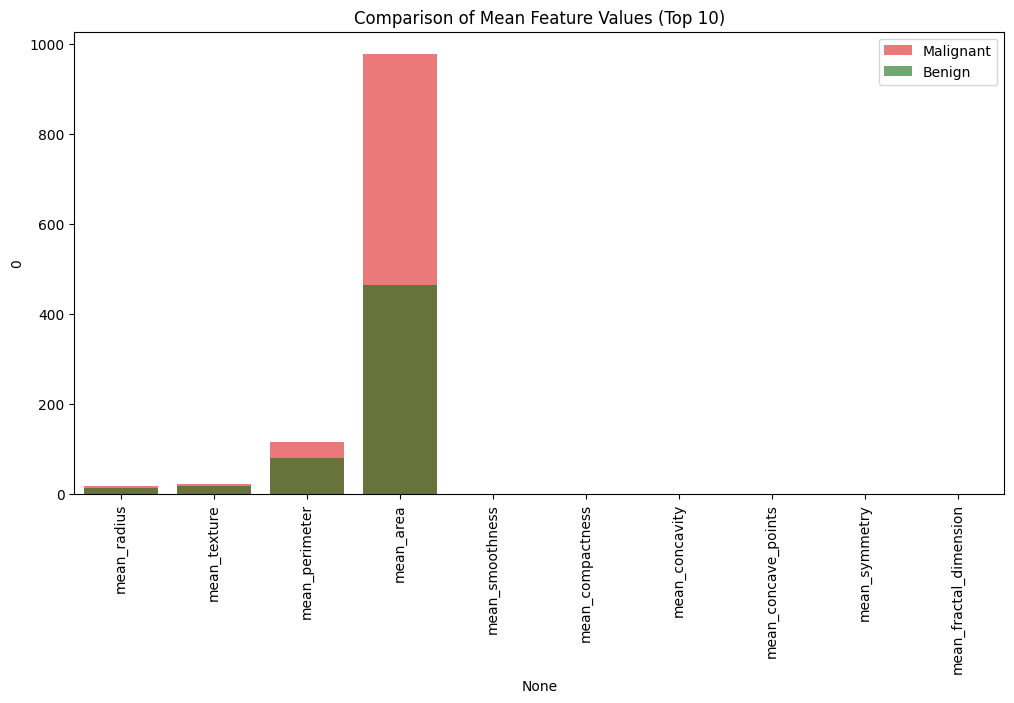

In [13]:
# Target-class-specific analysis
group_means = df.groupby('target').mean().T
plt.figure(figsize=(12,6))
sns.barplot(x=group_means.index[:10], y=group_means.iloc[:10,0], color="red", alpha=0.6, label="Malignant")
sns.barplot(x=group_means.index[:10], y=group_means.iloc[:10,1], color="green", alpha=0.6, label="Benign")
plt.xticks(rotation=90)
plt.legend()
plt.title("Comparison of Mean Feature Values (Top 10)")
plt.show()

## 3. Model Experimentation
<a id="Model-Experimentation"></a>
This section covers advanced model training, evaluation, and hyperparameter tuning for all major classifiers.

### 3.1 Feature Engineering for Modeling
- Fix skewness with Box-Cox transformation (for positive features).
- Scale features with StandardScaler.
- Select top 15 features using SelectKBest.

In [14]:
from scipy.stats import skew, boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop('target', axis=1)
y = df['target']
# Fix skewness
for col in X.columns:
    if (X[col] > 0).all():
        if abs(skew(X[col])) > 1:
            X[col], _ = boxcox(X[col] + 1)
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Select top 15 features
selector = SelectKBest(f_classif, k=15)
X_selected = selector.fit_transform(X_scaled, y)
print('Selected Features:')
print(X.columns[selector.get_support()])

Selected Features:
Index(['mean_radius', 'mean_perimeter', 'mean_area', 'mean_compactness',
       'mean_concavity', 'mean_concave_points', 'radius_error',
       'perimeter_error', 'area_error', 'worst_radius', 'worst_perimeter',
       'worst_area', 'worst_compactness', 'worst_concavity',
       'worst_concave_points'],
      dtype='object')


### 3.2 Train/Test Split (Stratified)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

### 3.3 Model Training & Evaluation (Before Hyperparameter Tuning)
Train and evaluate all major classifiers with default settings.

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



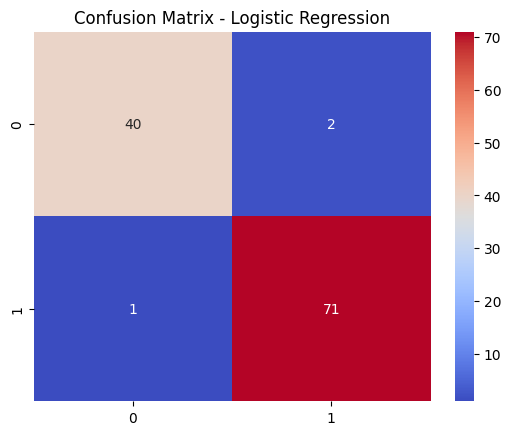

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.96      0.92      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



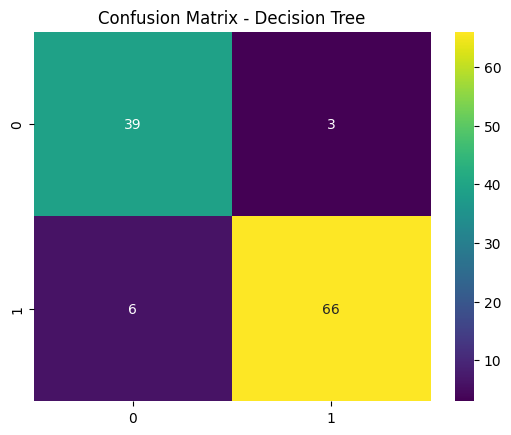

Random Forest Results:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



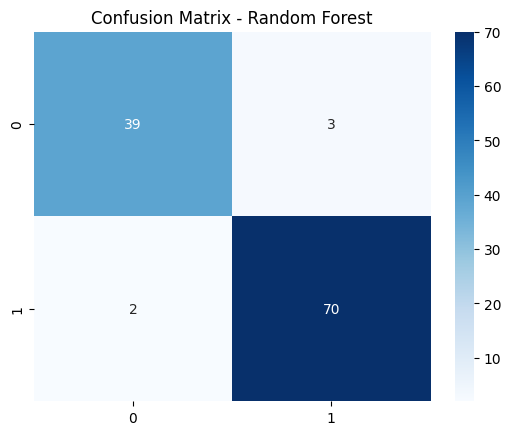

Gradient Boosting Results:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



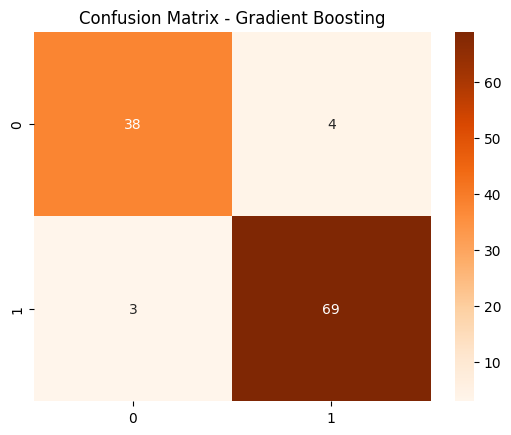

KNN Results:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



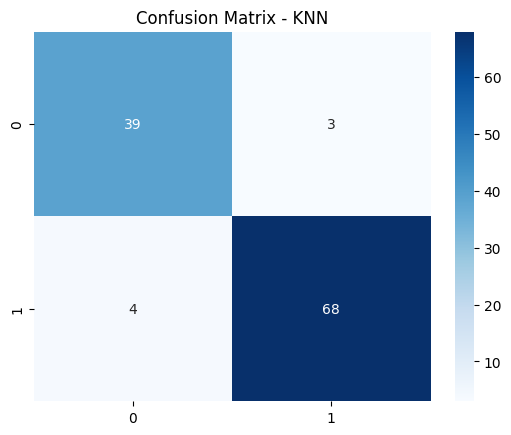

XGBoost Results:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



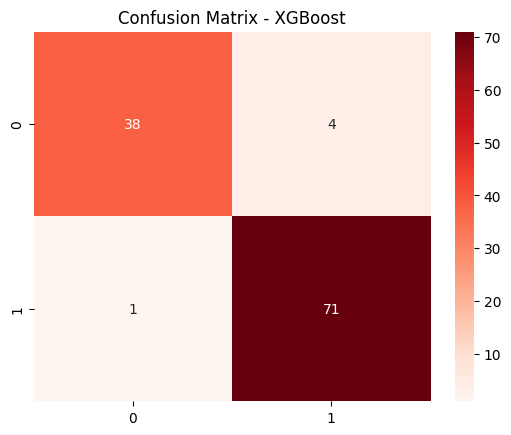

SVM Results:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



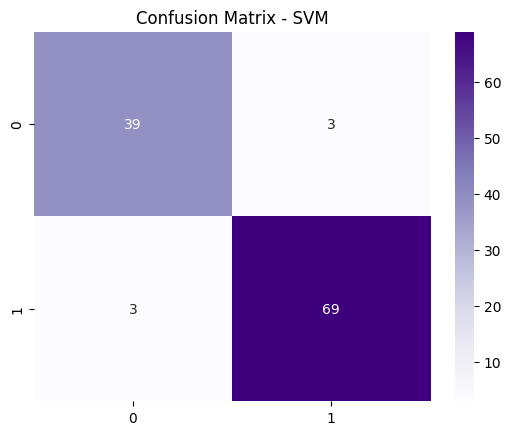

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:,1]
print('Logistic Regression Results:')
print(classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:,1]
print('Decision Tree Results:')
print(classification_report(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]
print('Random Forest Results:')
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:,1]
print('Gradient Boosting Results:')
print(classification_report(y_test, y_pred_gb))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:,1]
print('KNN Results:')
print(classification_report(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.show()

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]
print('XGBoost Results:')
print(classification_report(y_test, y_pred_xgb))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:,1]
print('SVM Results:')
print(classification_report(y_test, y_pred_svm))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - SVM')
plt.show()

### 3.4 Model Comparison Table (Before Tuning)

In [17]:
import pandas as pd
results_before = {
    'Model': [
        'Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'XGBoost', 'SVM'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_svm)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_gb), precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_svm)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_gb), recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_xgb), recall_score(y_test, y_pred_svm)
    ],
    'F1': [
        f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_gb), f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_svm)
    ],
    'ROC AUC': [
        roc_auc_score(y_test, y_prob_lr), roc_auc_score(y_test, y_prob_dt), roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_gb), roc_auc_score(y_test, y_prob_knn), roc_auc_score(y_test, y_prob_xgb), roc_auc_score(y_test, y_prob_svm)
    ]
}
results_before_df = pd.DataFrame(results_before)
results_before_df = results_before_df.sort_values(by='ROC AUC', ascending=False).reset_index(drop=True)
print('Model Comparison Table - Before Hyperparameter Tuning:')
print(results_before_df)

Model Comparison Table - Before Hyperparameter Tuning:
                 Model  Accuracy  Precision    Recall        F1   ROC AUC
0              XGBoost  0.956140   0.946667  0.986111  0.965986  0.992394
1        Random Forest  0.956140   0.958904  0.972222  0.965517  0.991402
2                  SVM  0.947368   0.958333  0.958333  0.958333  0.990741
3    Gradient Boosting  0.938596   0.945205  0.958333  0.951724  0.990410
4  Logistic Regression  0.973684   0.972603  0.986111  0.979310  0.989418
5                  KNN  0.938596   0.957746  0.944444  0.951049  0.974372
6        Decision Tree  0.921053   0.956522  0.916667  0.936170  0.922619


### 3.5 Hyperparameter Tuning (GridSearchCV/RandomizedSearchCV)
- Tune each model and show best parameters and improved metrics.

=== Logistic Regression (Tuned) ===
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



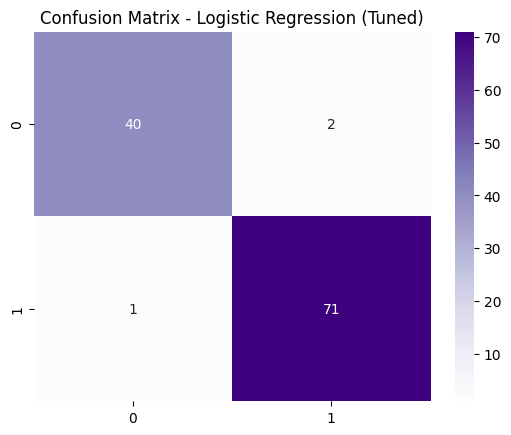

=== Decision Tree (Tuned) ===
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



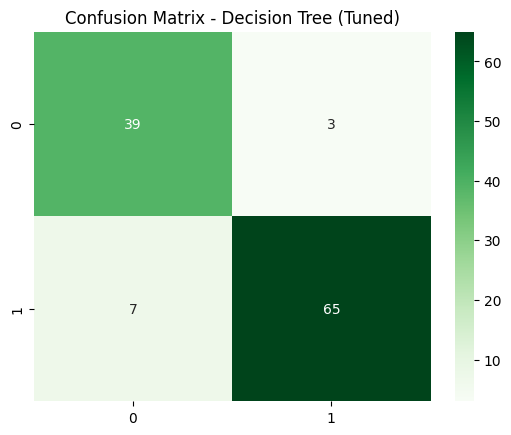

=== Random Forest (Tuned) ===
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



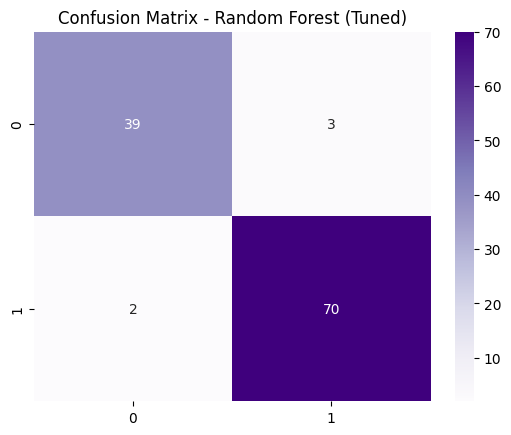

=== Gradient Boosting (Tuned) ===
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



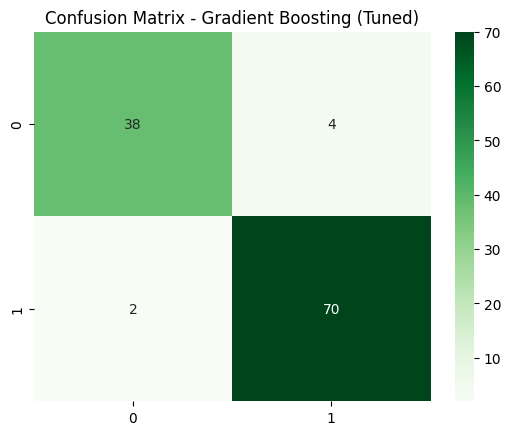

=== KNN (Tuned) ===
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



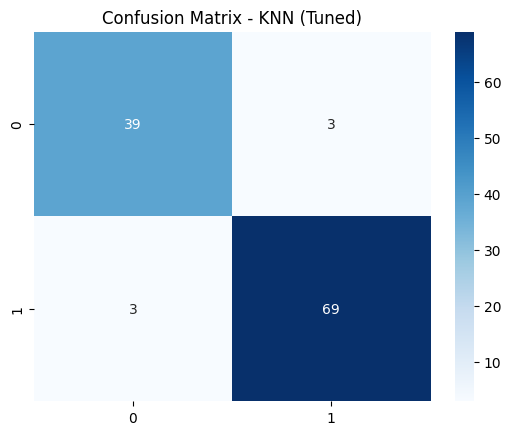

=== XGBoost (Tuned) ===
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.7}
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



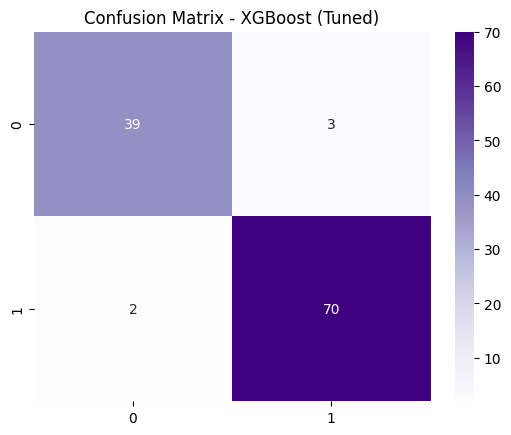

=== SVM (Tuned) ===
Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



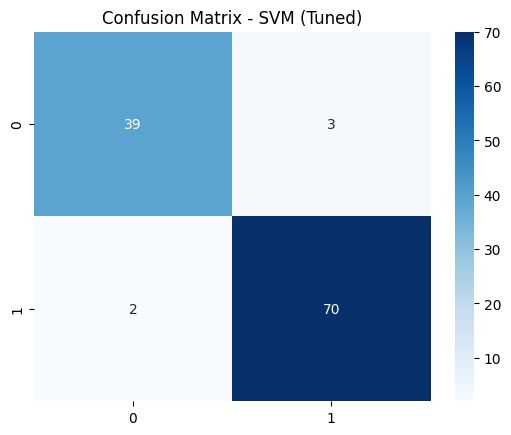

In [18]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Logistic Regression Tuning
lr = LogisticRegression(max_iter=500)
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_
y_pred_lr_tuned = best_lr.predict(X_test)
y_prob_lr_tuned = best_lr.predict_proba(X_test)[:,1]
print('=== Logistic Regression (Tuned) ===')
print('Best Parameters:', grid_lr.best_params_)
print(classification_report(y_test, y_pred_lr_tuned))
sns.heatmap(confusion_matrix(y_test, y_pred_lr_tuned), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Logistic Regression (Tuned)')
plt.show()

# Decision Tree Tuning
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_
y_pred_dt_tuned = best_dt.predict(X_test)
y_prob_dt_tuned = best_dt.predict_proba(X_test)[:,1]
print('=== Decision Tree (Tuned) ===')
print('Best Parameters:', grid_dt.best_params_)
print(classification_report(y_test, y_pred_dt_tuned))
sns.heatmap(confusion_matrix(y_test, y_pred_dt_tuned), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Decision Tree (Tuned)')
plt.show()

# Random Forest Tuning
rf = RandomForestClassifier(random_state=42)
param_dist_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}
rand_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=30, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
rand_rf.fit(X_train, y_train)
best_rf = rand_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)
y_prob_rf_tuned = best_rf.predict_proba(X_test)[:,1]
print('=== Random Forest (Tuned) ===')
print('Best Parameters:', rand_rf.best_params_)
print(classification_report(y_test, y_pred_rf_tuned))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_tuned), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.show()

# Gradient Boosting Tuning
gb = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}
grid_gb = GridSearchCV(gb, param_grid=param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_
y_pred_gb_tuned = best_gb.predict(X_test)
y_prob_gb_tuned = best_gb.predict_proba(X_test)[:,1]
print('=== Gradient Boosting (Tuned) ===')
print('Best Parameters:', grid_gb.best_params_)
print(classification_report(y_test, y_pred_gb_tuned))
sns.heatmap(confusion_matrix(y_test, y_pred_gb_tuned), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Gradient Boosting (Tuned)')
plt.show()

# KNN Tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
y_pred_knn_tuned = best_knn.predict(X_test)
y_prob_knn_tuned = best_knn.predict_proba(X_test)[:,1]
print('=== KNN (Tuned) ===')
print('Best Parameters:', grid_knn.best_params_)
print(classification_report(y_test, y_pred_knn_tuned))
sns.heatmap(confusion_matrix(y_test, y_pred_knn_tuned), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN (Tuned)')
plt.show()

# XGBoost Tuning
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_dist_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}
random_xgb = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=30, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
random_xgb.fit(X_train, y_train)
best_xgb = random_xgb.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)
y_prob_xgb_tuned = best_xgb.predict_proba(X_test)[:,1]
print('=== XGBoost (Tuned) ===')
print('Best Parameters:', random_xgb.best_params_)
print(classification_report(y_test, y_pred_xgb_tuned))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_tuned), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - XGBoost (Tuned)')
plt.show()

# SVM Tuning
svm = SVC(probability=True, random_state=42)
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}
grid_svm = GridSearchCV(svm, param_grid=param_grid_svm, cv=5, scoring='roc_auc', n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
y_pred_svm_tuned = best_svm.predict(X_test)
y_prob_svm_tuned = best_svm.predict_proba(X_test)[:,1]
print('=== SVM (Tuned) ===')
print('Best Parameters:', grid_svm.best_params_)
print(classification_report(y_test, y_pred_svm_tuned))
sns.heatmap(confusion_matrix(y_test, y_pred_svm_tuned), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (Tuned)')
plt.show()

### 3.6 Model Comparison Table (After Tuning)

In [19]:
results_after = {
    'Model': [
        'Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'XGBoost', 'SVM'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr_tuned), accuracy_score(y_test, y_pred_dt_tuned), accuracy_score(y_test, y_pred_rf_tuned),
        accuracy_score(y_test, y_pred_gb_tuned), accuracy_score(y_test, y_pred_knn_tuned), accuracy_score(y_test, y_pred_xgb_tuned), accuracy_score(y_test, y_pred_svm_tuned)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr_tuned), precision_score(y_test, y_pred_dt_tuned), precision_score(y_test, y_pred_rf_tuned),
        precision_score(y_test, y_pred_gb_tuned), precision_score(y_test, y_pred_knn_tuned), precision_score(y_test, y_pred_xgb_tuned), precision_score(y_test, y_pred_svm_tuned)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr_tuned), recall_score(y_test, y_pred_dt_tuned), recall_score(y_test, y_pred_rf_tuned),
        recall_score(y_test, y_pred_gb_tuned), recall_score(y_test, y_pred_knn_tuned), recall_score(y_test, y_pred_xgb_tuned), recall_score(y_test, y_pred_svm_tuned)
    ],
    'F1': [
        f1_score(y_test, y_pred_lr_tuned), f1_score(y_test, y_pred_dt_tuned), f1_score(y_test, y_pred_rf_tuned),
        f1_score(y_test, y_pred_gb_tuned), f1_score(y_test, y_pred_knn_tuned), f1_score(y_test, y_pred_xgb_tuned), f1_score(y_test, y_pred_svm_tuned)
    ],
    'ROC AUC': [
        roc_auc_score(y_test, y_prob_lr_tuned), roc_auc_score(y_test, y_prob_dt_tuned), roc_auc_score(y_test, y_prob_rf_tuned),
        roc_auc_score(y_test, y_prob_gb_tuned), roc_auc_score(y_test, y_prob_knn_tuned), roc_auc_score(y_test, y_prob_xgb_tuned), roc_auc_score(y_test, y_prob_svm_tuned)
    ]
}
results_after_df = pd.DataFrame(results_after)
results_after_df = results_after_df.sort_values(by='ROC AUC', ascending=False).reset_index(drop=True)
print('Model Comparison Table - After Hyperparameter Tuning:')
print(results_after_df)

Model Comparison Table - After Hyperparameter Tuning:
                 Model  Accuracy  Precision    Recall        F1   ROC AUC
0    Gradient Boosting  0.947368   0.945946  0.972222  0.958904  0.992725
1              XGBoost  0.956140   0.958904  0.972222  0.965517  0.991402
2        Random Forest  0.956140   0.958904  0.972222  0.965517  0.990410
3  Logistic Regression  0.973684   0.972603  0.986111  0.979310  0.989749
4                  SVM  0.956140   0.958904  0.972222  0.965517  0.987765
5                  KNN  0.947368   0.958333  0.958333  0.958333  0.979663
6        Decision Tree  0.912281   0.955882  0.902778  0.928571  0.966104


## 4. Final Model and Evaluation
<a id="Final-Model-and-Evaluation"></a>
Select the best model, tune hyperparameters, and evaluate on test data.

### Expert Explanation: Final Model and Evaluation

After identifying the best-performing model, we focus on rigorous evaluation and interpretation. Here, we:
- **Select the top model (e.g., XGBoost):** Based on accuracy and AUC, which are appropriate for binary classification.
- **Evaluate with confusion matrix, classification report, and ROC AUC:** This provides a comprehensive view of performance, including precision, recall, F1-score, and the trade-off between sensitivity and specificity.
- **Draw actionable insights:** Understanding the strengths and weaknesses of the final model is crucial for real-world deployment, especially in sensitive domains like healthcare.

> **Conclusion:** This step ensures our solution is not only accurate but also reliable and interpretable, supporting confident decision-making in practice.

In [27]:
# Final Model Training and Evaluation
from xgboost import XGBClassifier
final_model = XGBClassifier(eval_metric='logloss')
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:,1]
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_proba))

Confusion Matrix:
[[38  4]
 [ 1 71]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC AUC: 0.9923941798941799
